In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("tip.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# display the first five rows.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Check for null values and data types of each column.
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [4]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [5]:
# How many rows and columns are there in the dataset?
df.shape

(244, 7)

In [6]:
# Get a summary of the dataset using descriptive statistics.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

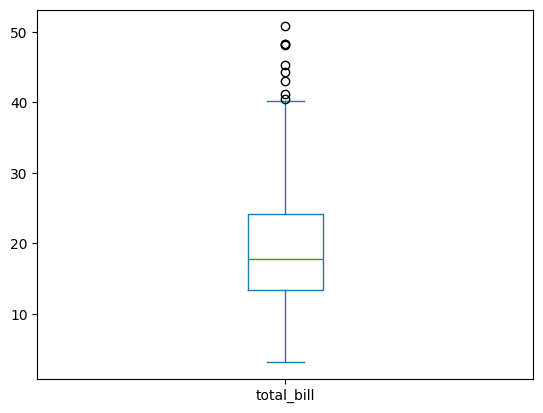

In [7]:
#Analyze the distribution of the total_bill column using a histogram and boxplot.
df["total_bill"].plot(kind="box")

<Axes: ylabel='Frequency'>

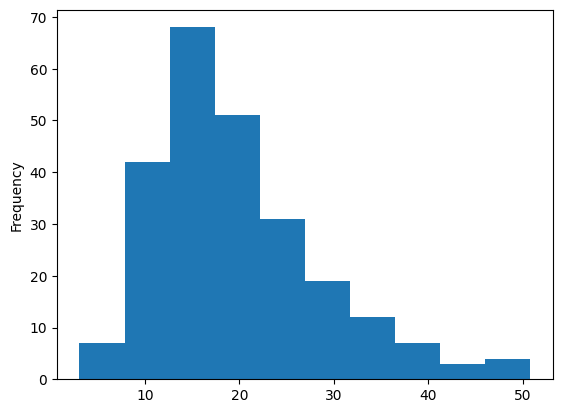

In [8]:
df["total_bill"].plot(kind="hist")

<Axes: ylabel='count'>

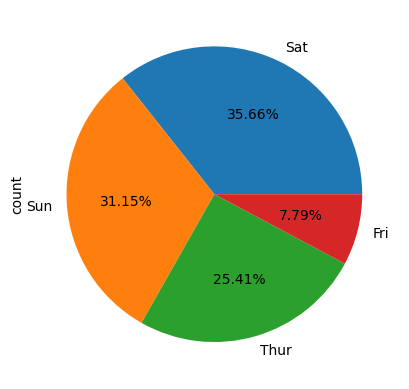

In [9]:
#Find the most common day when customers visit the restaurant.
df["day"].value_counts().plot(kind="pie",autopct="%0.2f%%")

<Axes: xlabel='sex'>

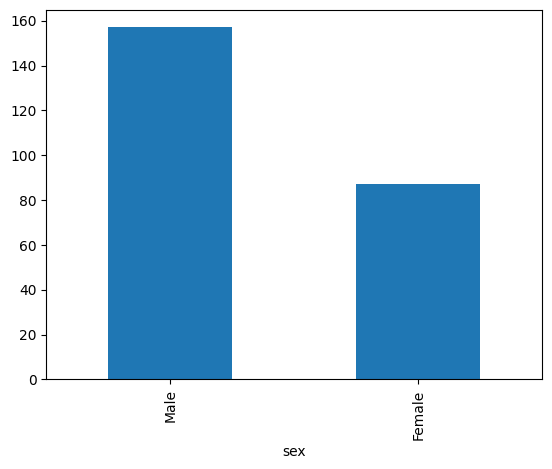

In [10]:
#Count the number of male and female customers. Visualize this using a bar plot.
df["sex"].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

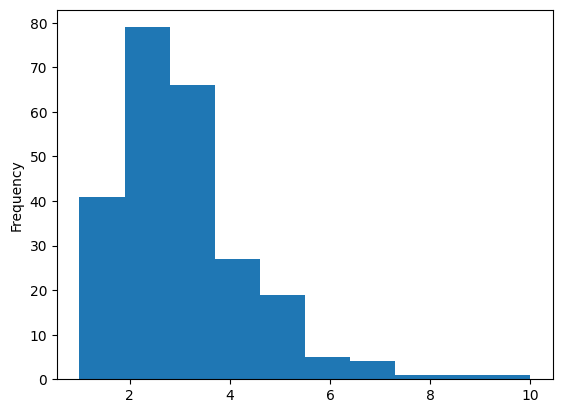

In [11]:
#Check the distribution of tips. What is the average tip amount?
df["tip"].plot(kind="hist")

In [23]:
df["tip"].mean()

2.99827868852459

<Axes: xlabel='total_bill', ylabel='tip'>

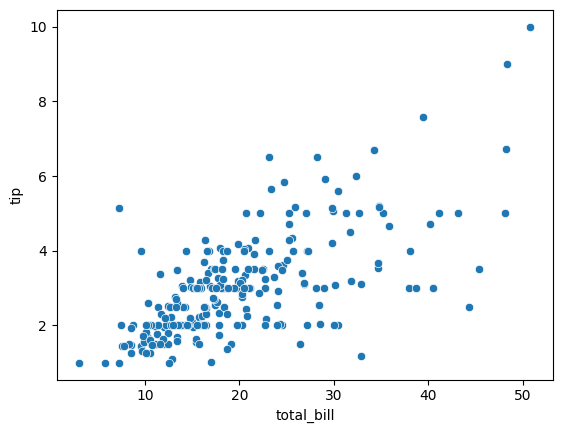

In [24]:
#Bivariate Analysis
#1. Create a scatter plot to visualize the relationship between total_bill and tip. Does the tip amount increase with the total bill?
sns.scatterplot(data=df,y="tip",x="total_bill")

<Axes: xlabel='sex', ylabel='tip'>

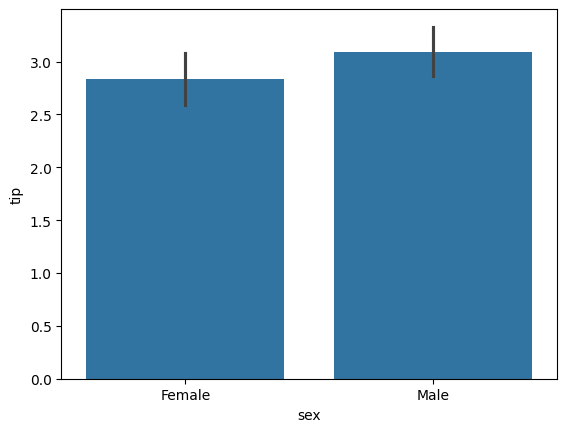

In [25]:
#Compare the average tip amount given by male and female customers. Use a bar plot to visualize this.
sns.barplot(data=df,x="sex",y="tip")

In [26]:
#Analyze how the tip percentage (tip / total_bill * 100) varies across different time (Lunch vs. Dinner). Use a boxplot to visualize this.
percentage=(df["tip"]/df["total_bill"]*100)
percentage

,0
0,5.944673
1,16.054159
2,16.658734
3,13.978041
4,14.680765
...,...
239,20.392697
240,7.358352
241,8.822232
242,9.820426


In [28]:
df["percentage"]=percentage

<Axes: xlabel='time', ylabel='percentage'>

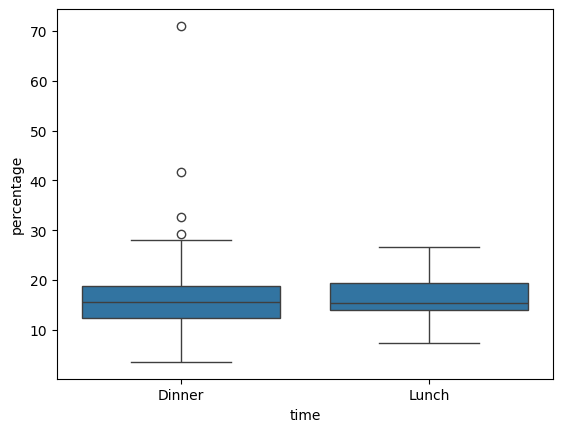

In [29]:
sns.boxplot(data=df,x="time",y="percentage")


<Axes: >

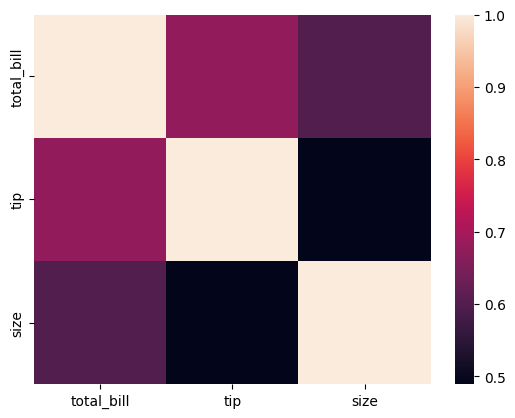

In [30]:
#Create a heatmap to display the correlation matrix of the numerical columns.
sns.heatmap(df[["total_bill","tip","size"]].corr())

In [31]:
#Grouped Analysis
#1. Find the average total_bill and tip for each day of the week.
group=df.groupby("day")
group.groups

{'Fri': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 220, 221, 222, 223, 224, 225, 226], 'Sat': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 168, 169, 170, 171, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242], 'Sun': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 112, 113, 114, 115, 116, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], 'Thur': [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136

In [32]:
df.groupby("day")["total_bill"].mean()

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


In [33]:
df.groupby("day")["tip"].mean()

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


In [34]:
#Determine the day with the highest average tip percentage.
df.groupby("day")["percentage"].mean().max()

16.991302873347887

In [35]:
#Calculate the average total_bill grouped by size. Visualize this using a bar plot.
df.groupby("size")["total_bill"].mean()

,total_bill
size,
1,7.242500
2,16.448013
3,23.277632
4,28.613514
5,30.068000
6,34.830000


In [36]:
#Advanced Analysis
# Find the time (Lunch or Dinner) with the highest average tip_percentage
df.groupby("time")["tip"].mean().max()

3.102670454545455

In [37]:
# Analyze the tipping behavior based on smoking preference (smoker). Who tips more, smokers or non-smokers?
df.groupby("smoker")["tip"].mean()

,tip
smoker,
No,2.991854
Yes,3.008710


<Axes: xlabel='time', ylabel='total_bill'>

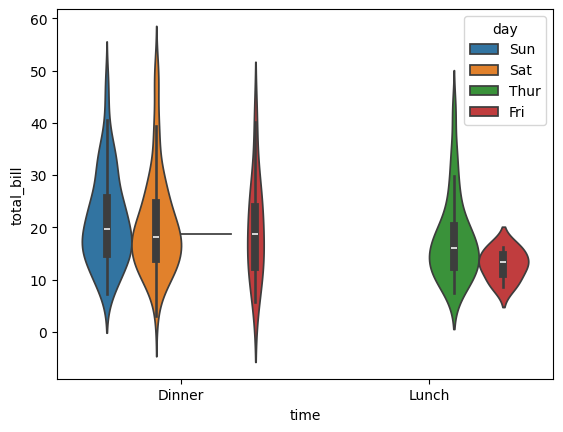

In [38]:
#Visualization Challenge
#Create a violin plot to analyze the distribution of total_bill based on day and time.
sns.violinplot(data=df,y="total_bill",x="time",hue="day")

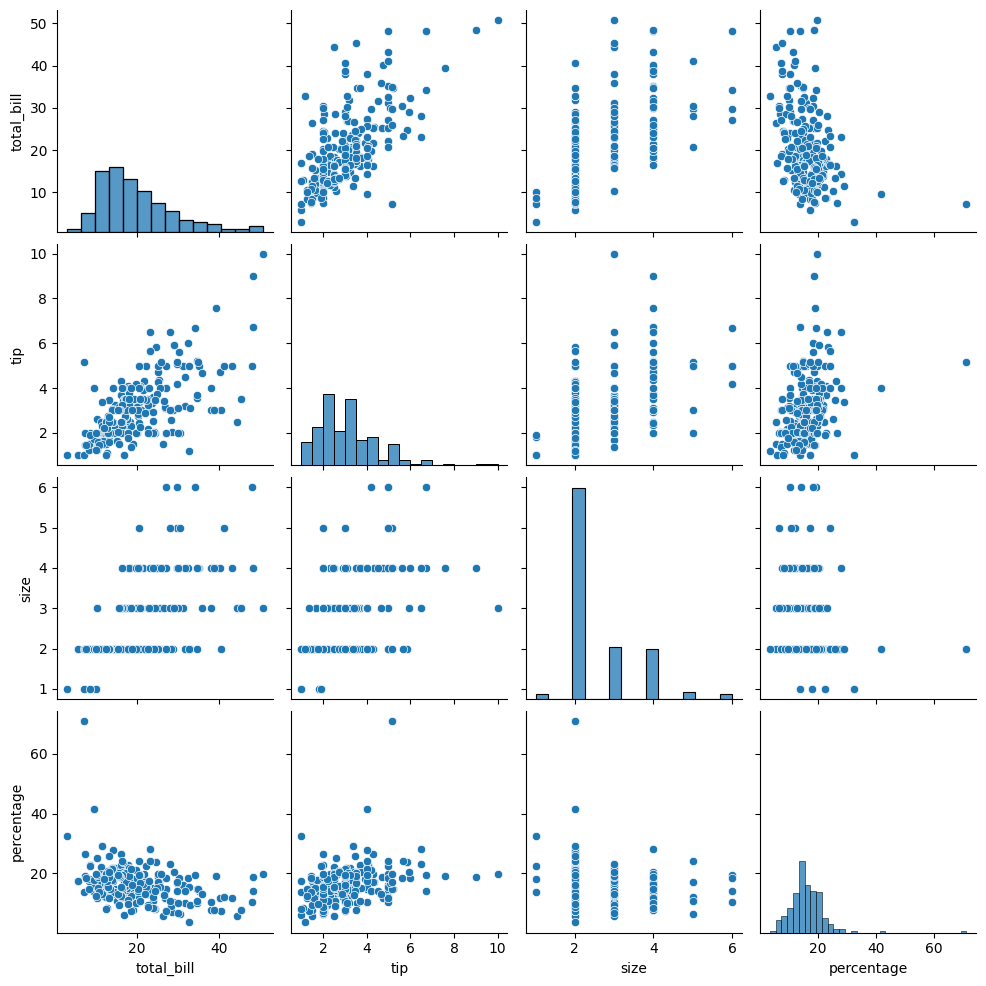

In [39]:
#Create a pair plot for the numerical columns in the dataset. What insights can you gather from it
sns.pairplot(df)